In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Pizzaïo’jo orders data

In [2]:
df = pd.read_excel(r"C:\Users\rutta\OneDrive\Documents\pizzaiojo\pizza_sales\Data Model - Pizza Sales.xlsx", sheet_name="pizza_sales")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Pizzas uniques : __91__

In [3]:
# 2. Informations de base :
# a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?
unique_pizza_count = df['pizza_id'].nunique()
unique_pizza_name_count = df['pizza_name'].nunique()
print("Pizzas uniques:", unique_pizza_count)
print()
print("Noms de Pizzas uniques:", unique_pizza_name_count)

Pizzas uniques: 91

Noms de Pizzas uniques: 32


## Commandes uniques : __21350__

In [4]:
# 2. Informations de base :
# b. Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?
unique_order_id = df['order_id'].nunique()
print('Commandes uniques:', unique_order_id)
print()

total_pizzas_sold = df['quantity'].sum()
print('Pizzas vendus en total:', total_pizzas_sold)

Commandes uniques: 21350

Pizzas vendus en total: 49574


## Plage de dates : __2015-01-01 - 2015-12-31__

In [5]:
# 3. Analyse temporelle :
# a. Quelle est la plage de dates dans le jeu de données ?
date_range = df['order_date'].dt.date.min().strftime('%Y-%m-%d') + ' - ' + df['order_date'].dt.date.max().strftime('%Y-%m-%d')
print("Plage de dates dans le jeu de données:", date_range)

Plage de dates dans le jeu de données: 2015-01-01 - 2015-12-31


## Commandes passées chaque jour : moyenne quotidienne est d'environ __59,64__ commandes

                          order_date  Number of orders
count                            358        358.000000
mean   2015-06-29 20:34:51.620111616         59.636872
min              2015-01-01 00:00:00         27.000000
25%              2015-03-31 06:00:00         55.000000
50%              2015-06-28 12:00:00         59.000000
75%              2015-09-27 18:00:00         64.000000
max              2015-12-31 00:00:00        115.000000
std                              NaN         10.050126


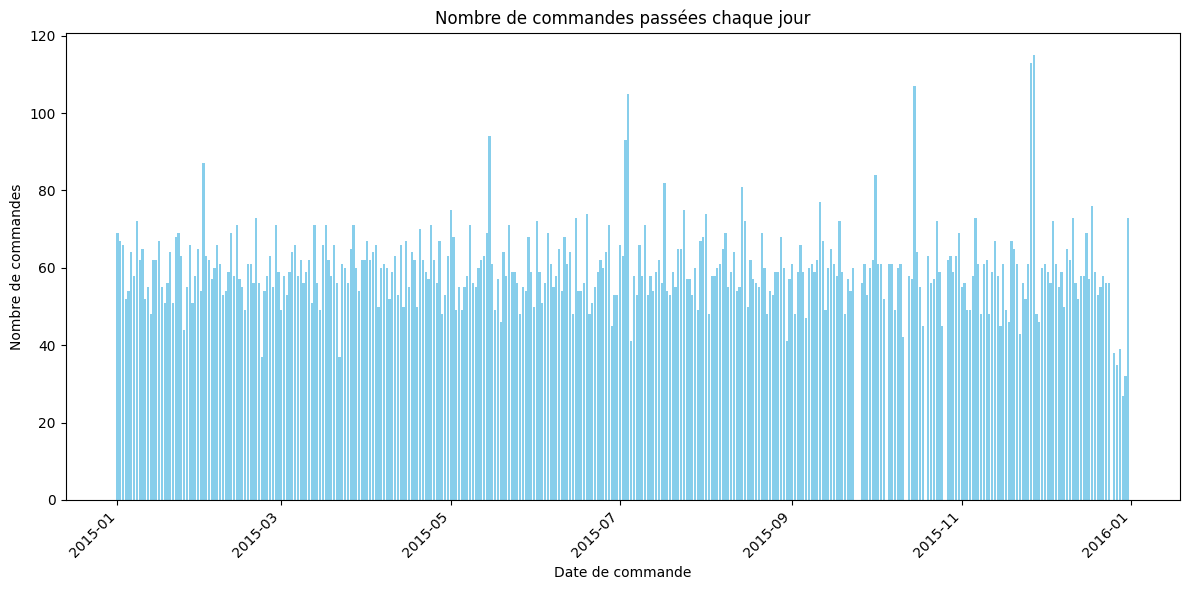

In [6]:
# 3. Analyse temporelle :
# b. Combien de commandes ont été passées chaque jour ?
orders_per_day = df.groupby('order_date')['order_id'].nunique().reset_index(name='Number of orders')
print(orders_per_day.describe())

plt.figure(figsize=(12, 6))
plt.bar(orders_per_day['order_date'], orders_per_day['Number of orders'], color='skyblue')
plt.title('Nombre de commandes passées chaque jour')
plt.xlabel('Date de commande')
plt.ylabel('Nombre de commandes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Durée moyenne par commande : __11.02 minutes__

Bien qu'il soit délicat de calculer le temps moyen de commande étant donné que l'heure de fin de préparation de la commande n'est pas disponible, nous pouvons avoir une vue globale du temps de commande. 

Les résultats identiques ont été obtenus par deux méthodes de calcul:
- La première méthode consiste à calculer les intervalles entre les commandes, puis à trouver la moyenne de ces intervalles.  
- La deuxième méthode implique le calcul du temps de travail quotidien, c'est-à-dire la période entre la première et la dernière commande de la journée, divisé par la somme des écarts de temps entre chaque commande de cette journée. Nous avons opté pour cette dernière approche.

In [7]:
# 3. Analyse temporelle :
# c. Quelle est la durée moyenne pour traiter une commande ?
new_df = pd.DataFrame({
    'order_id': df['order_id'],
    'order_date': df['order_date'],
    'order_time': df['order_time']
})
new_df = new_df.groupby('order_id').first().reset_index()
new_df['order_datetime'] = pd.to_datetime(new_df['order_date'].astype(str) + ' ' + new_df['order_time'].astype(str))
# Group by 'order_date' to get daily information
daily_df = new_df.groupby('order_date', as_index=False).agg({
    'order_datetime': ['min', 'max'],
    'order_id': 'nunique'  # Count unique order ids for each day
})
# Calculate the time difference between the last and first order date times
daily_df['time_diff'] = daily_df['order_datetime']['max'] - daily_df['order_datetime']['min']
# Count the number of orders taken on that day minus one (excluding the last order)
daily_df['num_orders'] = daily_df['order_id'] - 1
overall_sum_time_diff = daily_df['time_diff'].sum()
overall_sum_num_orders = daily_df['num_orders'].sum()
# Calculate the average time per order in minutes across all days
overall_avg_time_per_order_minutes = overall_sum_time_diff.total_seconds() / 60 / overall_sum_num_orders
print(f"Durée moyenne par commande : {overall_avg_time_per_order_minutes:.2f} minutes")

Durée moyenne par commande : 11.02 minutes


## Quantité moyenne de pizzas commandées : __2.32__

Quantité moyenne de pizzas commandées : 2.32



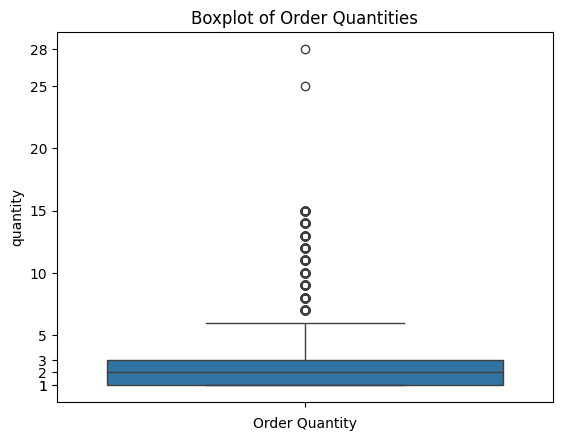

In [8]:
# 4. Analyse de la quantité :
# a. Quelle est la quantité moyenne de pizzas commandées ?
order_quantities_df = pd.DataFrame({
    'order_id': df['order_id'],
    'quantity': df['quantity']
})
grouped_order_quantities = order_quantities_df.groupby('order_id', as_index=False)['quantity'].sum()
avg_quantity_pizzas = grouped_order_quantities['quantity'].mean()
print(f"Quantité moyenne de pizzas commandées : {avg_quantity_pizzas:.2f}")
print()

# Assuming grouped_order_quantities is your DataFrame
sns.boxplot(y='quantity', data=grouped_order_quantities)
plt.title('Boxplot of Order Quantities')
plt.xlabel('Order Quantity')
ticks = list(grouped_order_quantities['quantity'].describe().loc[['25%', '50%', '75%', 'min', 'max']])
ticks += [tick for tick in range(5, max(grouped_order_quantities['quantity']), 5)]  # Add ticks by 5
plt.yticks(ticks)
plt.show()


## La taille de pizza la plus fréquemment commandée : __L__

La taille de pizza la plus fréquemment commandée : L


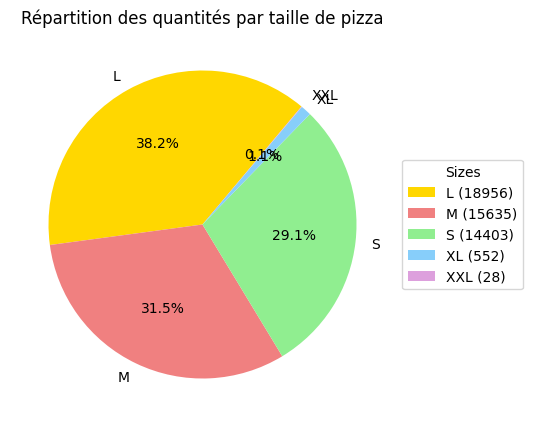

In [9]:
# 4. Analyse de la quantité :
# b. Quelle est la taille de pizza la plus fréquemment commandée ?
pizza_quantities_df = pd.DataFrame({
    'pizza_size': df['pizza_size'],
    'quantity': df['quantity']
})
grouped_pizza_sizes = pizza_quantities_df.groupby('pizza_size', as_index=False)['quantity'].sum()
grouped_pizza_sizes = grouped_pizza_sizes.sort_values(by='quantity', ascending=False)
most_frequent_pizza_size = grouped_pizza_sizes['pizza_size'].iloc[0]
print(f"La taille de pizza la plus fréquemment commandée : {most_frequent_pizza_size}")

labels = grouped_pizza_sizes['pizza_size']
sizes = grouped_pizza_sizes['quantity']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=50, colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue', 'plum'])
legend_labels = [f"{size} ({quantity})" for size, quantity in zip(grouped_pizza_sizes['pizza_size'], grouped_pizza_sizes['quantity'])]

# Positioning the legend to the right of the pie chart
ax.legend(wedges, legend_labels, title="Sizes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Setting the title
plt.title("Répartition des quantités par taille de pizza")
plt.show()

## La catégorie de pizza la plus fréquemment commandée : __Classic__

La catégorie de pizza la plus fréquemment commandée : Classic



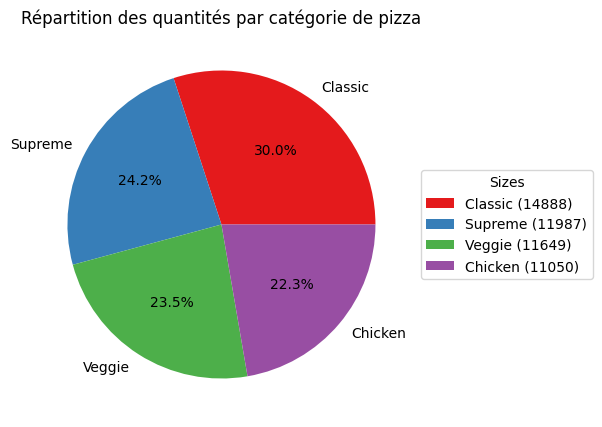

In [10]:
# 4. Analyse de la quantité :
# c. Quelle est la catégorie de pizza la plus fréquemment commandée ?
pizza_categories_df = pd.DataFrame({
    'pizza_category': df['pizza_category'],
    'quantity': df['quantity']
})
grouped_pizza_categories = pizza_categories_df.groupby('pizza_category', as_index=False)['quantity'].sum()
grouped_pizza_categories = grouped_pizza_categories.sort_values(by='quantity', ascending=False)
most_frequent_pizza_category = grouped_pizza_categories['pizza_category'].iloc[0]
print(f"La catégorie de pizza la plus fréquemment commandée : {most_frequent_pizza_category}")
print()

labels = grouped_pizza_categories['pizza_category']
sizes = grouped_pizza_categories['quantity']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=plt.cm.Set1.colors)
legend_labels = [f"{category} ({quantity})" for category, quantity in zip(grouped_pizza_categories['pizza_category'], grouped_pizza_categories['quantity'])]

# Positioning the legend to the right of the pie chart
ax.legend(wedges, legend_labels, title="Sizes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Setting the title
plt.title("Répartition des quantités par catégorie de pizza")
plt.show()

## Le prix unitaire moyen des pizzas : __16.51__

Le prix unitaire moyen des pizzas est : 16.51 (16.506043956043957)

Average unit price by pizza size:
pizza_size
S      12.538333
M      16.008621
L      20.006667
XL     25.500000
XXL    35.950000



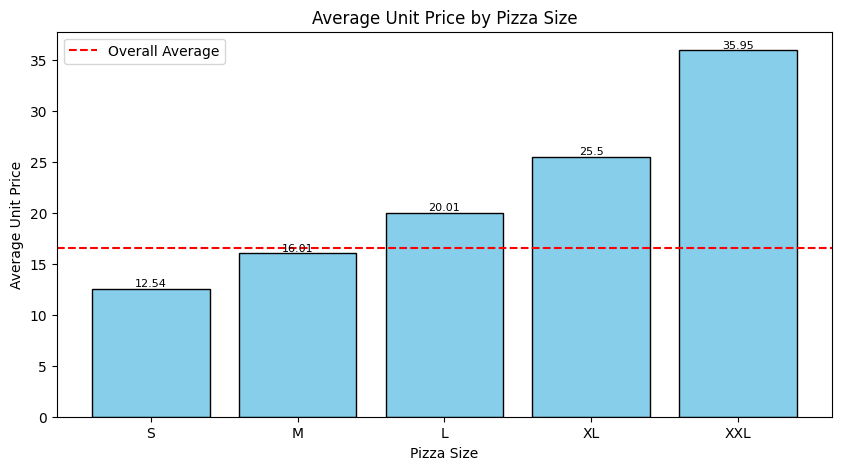

In [11]:
# 5. Analyse des prix :
# a. Quel est le prix unitaire moyen des pizzas ?
pizza_prices_df = df[['pizza_id', 'pizza_size', 'pizza_category', 'unit_price']].drop_duplicates()
average_unit_price = pizza_prices_df['unit_price'].mean()
print(f"Le prix unitaire moyen des pizzas est : {round(average_unit_price, 2)} ({average_unit_price})")
print()

# Average by pizza size
average_unit_price_by_size = pizza_prices_df.groupby(df['pizza_size'])['unit_price'].mean().sort_values()
print("Average unit price by pizza size:")
print(average_unit_price_by_size.to_string(index=True))
print()

# Plotting the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(average_unit_price_by_size.index, average_unit_price_by_size.values, color='skyblue', edgecolor='black')
plt.axhline(y=16.51, color='red', linestyle='--', label='Overall Average')

# Adding price labels to the end of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title("Average Unit Price by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Average Unit Price")
plt.legend()
plt.show()

## Le prix total moyen d'une commande : __38.31__

In [12]:
# 5. Analyse des prix :
# b. Quel est le prix total moyen d'une commande ?
df['order_price'] = df['quantity'] * df['unit_price']
order_prices_df = df.groupby('order_id', as_index=False)['order_price'].sum()
average_order_price = order_prices_df['order_price'].mean()
print(f"Le prix total moyen d'une commande est : {round(average_order_price, 2)}")

Le prix total moyen d'une commande est : 38.31


## La pizza au prix unitaire le plus élevé : __The Greek Pizza XXL - 35.95__

In [13]:
# 5. Analyse des prix :
# c. Quelle pizza a le prix unitaire le plus élevé ?
pizza_prices_df = df[['pizza_id', 'unit_price']].drop_duplicates()
pizza_prices_df = pizza_prices_df.sort_values(by='unit_price', ascending=False)
most_expensive_pizza_id = pizza_prices_df['pizza_id'].iloc[0]
most_expensive_pizza_name = df[df['pizza_id'] == most_expensive_pizza_id]['pizza_name'].iloc[0]
most_expensive_pizza_unit_price = pizza_prices_df['unit_price'].iloc[0]
print(f"La pizza la plus chère : {most_expensive_pizza_name}, ID : {most_expensive_pizza_id}, Prix unitaire : {most_expensive_pizza_unit_price}")

La pizza la plus chère : The Greek Pizza, ID : the_greek_xxl, Prix unitaire : 35.95


## Répartition des ventes de pizzas par taille :

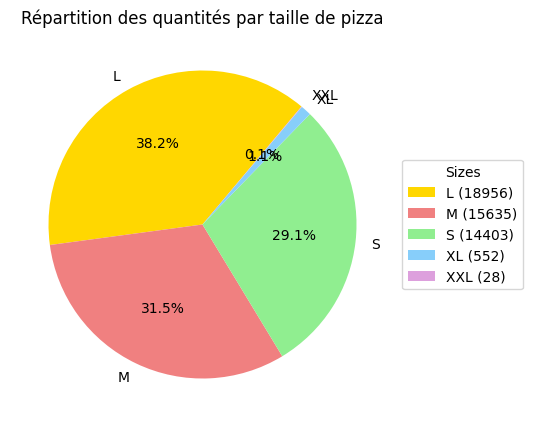

In [14]:
# 6. Répartition par taille et catégorie :
# a. Combien de pizzas de chaque taille ont été vendues ?
labels = grouped_pizza_sizes['pizza_size']
sizes = grouped_pizza_sizes['quantity']

fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=50, colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue', 'plum'])
legend_labels = [f"{size} ({quantity})" for size, quantity in zip(grouped_pizza_sizes['pizza_size'], grouped_pizza_sizes['quantity'])]

# Positioning the legend to the right of the pie chart
ax.legend(wedges, legend_labels, title="Sizes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Répartition des quantités par taille de pizza")
plt.show()

## Répartition de pizzas par catégorie :

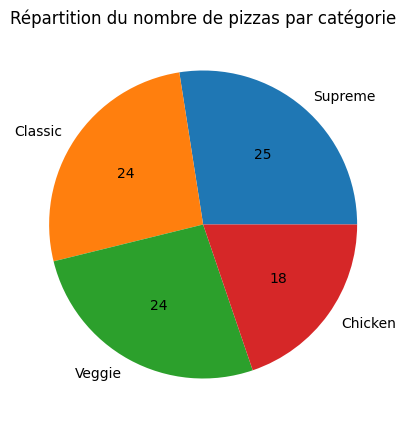

In [22]:
# 6. Répartition par taille et catégorie :
# b. Combien de pizzas y a-t-il dans chaque catégorie ?
pizza_categories_df = df[['pizza_id', 'pizza_category']].drop_duplicates()
category_counts = pizza_categories_df.groupby('pizza_category')['pizza_id'].count()
category_counts = category_counts.reset_index()
category_counts = category_counts.sort_values(by='pizza_id', ascending=False)
#print("Nombre de pizzas par catégorie :")
#print(category_counts.to_string(index=False))

plt.figure(figsize=(5, 5))
plt.pie(category_counts['pizza_id'], labels=category_counts['pizza_category'], autopct=lambda p: f'{int(p * sum(category_counts["pizza_id"])/100)}')
plt.title("Répartition du nombre de pizzas par catégorie")
plt.show()

## Les ingrédients les plus couramment utilisés dans toutes les pizzas :  
### __Garlic, Tomatoes, Red Onions, Red Peppers, Spinach__

In [23]:
# 7. Analyse des ingrédients :
# a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?
pizza_ingredients_df = df[['pizza_id', 'pizza_ingredients']].drop_duplicates()
pizza_ingredients_df['ingredient_list'] = pizza_ingredients_df['pizza_ingredients'].str.split(', ')

exploded_df = pizza_ingredients_df.explode('ingredient_list')
ingredient_counts = exploded_df['ingredient_list'].value_counts().reset_index()
ingredient_counts.columns = ['ingredient', 'pizza_count']
print("Les top cinq ingrédients et leur pizza compte:")
print(ingredient_counts.head(5).to_string(index=False))

Les top cinq ingrédients et leur pizza compte:
 ingredient  pizza_count
     Garlic           57
   Tomatoes           56
 Red Onions           41
Red Peppers           30
    Spinach           24


## Le nombre de pizzas contenant des ingrédients spécifiques :

In [24]:
# 7. Analyse des ingrédients :
# b. Combien de pizzas contiennent un ingrédient spécifique (par exemple, pepperoni, champignons) ?
specific_ingredients = ["Pepperoni", "Sausage", "Bacon", "Pancetta", "Onions", "Peppers", "Mushrooms", "Garlic", "Red Onion"]
for specific_ingredient in specific_ingredients:
    pizza_count_with_specific_ingredient = ingredient_counts[ingredient_counts["ingredient"].str.contains(specific_ingredient)]["pizza_count"].sum()
    print(f"Nombre de pizzas contenant l'ingrédient {specific_ingredient} et ses variations : {pizza_count_with_specific_ingredient}")
    print()

single_use_ingredients = ingredient_counts[ingredient_counts["pizza_count"] == 1]["ingredient"]

#print("Ingrédients utilisés une seule fois:")
#print(single_use_ingredients.to_string(index=False))

Nombre de pizzas contenant l'ingrédient Pepperoni et ses variations : 16

Nombre de pizzas contenant l'ingrédient Sausage et ses variations : 5

Nombre de pizzas contenant l'ingrédient Bacon et ses variations : 4

Nombre de pizzas contenant l'ingrédient Pancetta et ses variations : 3

Nombre de pizzas contenant l'ingrédient Onions et ses variations : 45

Nombre de pizzas contenant l'ingrédient Peppers et ses variations : 51

Nombre de pizzas contenant l'ingrédient Mushrooms et ses variations : 21

Nombre de pizzas contenant l'ingrédient Garlic et ses variations : 57

Nombre de pizzas contenant l'ingrédient Red Onion et ses variations : 41



## La répartition du nombre de pizzas par commande :

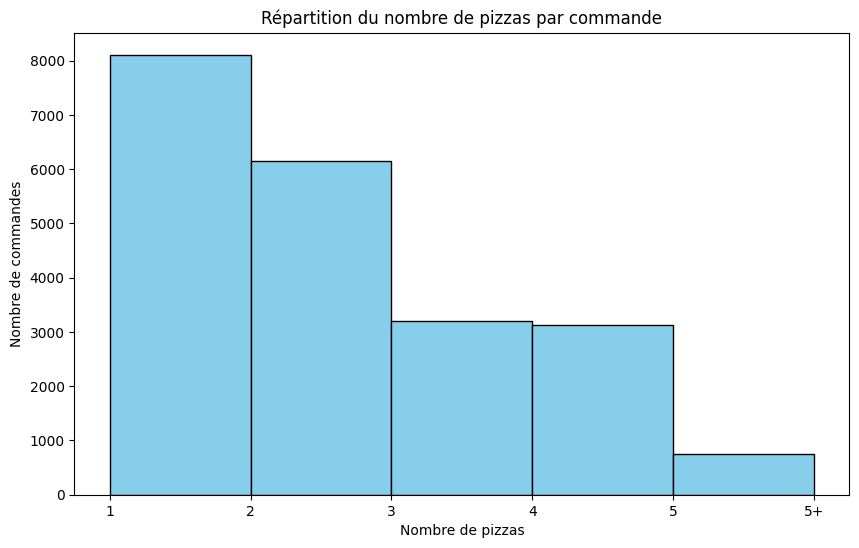

In [25]:
# 8. Détails de la commande :
# a. Quelle est la répartition du nombre de pizzas par commande ?
order_quantity_df = df.groupby('order_id').agg({'quantity': 'sum'})

# Combine quantities 5 or more into a single category
order_quantity_df['quantity'] = order_quantity_df['quantity'].apply(lambda x: '5+' if x >= 6 else str(x))

order_quantity_df_sorted = order_quantity_df.sort_values(by='quantity', ascending=True)

plt.figure(figsize=(10, 6))
plt.hist(order_quantity_df_sorted['quantity'], bins=5, color='skyblue', edgecolor='black')
plt.title("Répartition du nombre de pizzas par commande")
plt.xlabel("Nombre de pizzas")
plt.ylabel("Nombre de commandes")
plt.show()
print()

## La répartition des prix totaux pour les commandes :

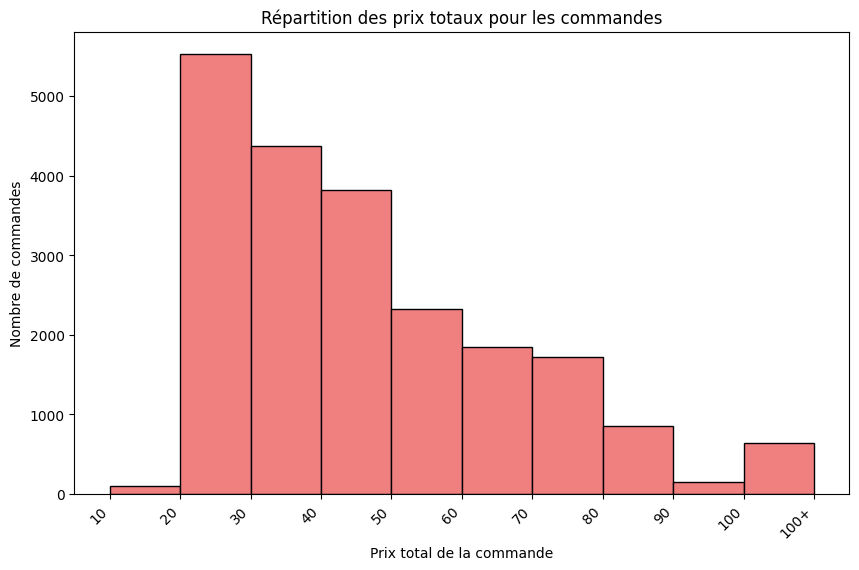

In [26]:
# 8. Détails de la commande :
# b. Quelle est la répartition des prix totaux pour les commandes ?
order_price_df = df.groupby('order_id').agg({'order_price': 'sum'}).reset_index()

# Define the custom bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]

# Create a new column 'order_price_label' with bin labels
order_price_df['order_price_label'] = pd.cut(order_price_df['order_price'], bins=bins, include_lowest=True)

# Map the labels to strings
order_price_df['order_price_label'] = order_price_df['order_price_label'].apply(lambda x: f"{int(x.right)}" if x.right < float('inf') else f"{int(x.left)}+")
order_price_df = order_price_df.sort_values(by='order_price', ascending=True)

plt.figure(figsize=(10, 6))
plt.hist(order_price_df['order_price_label'], bins=10, color='lightcoral', edgecolor='black')
plt.title("Répartition des prix totaux pour les commandes")
plt.xlabel("Prix total de la commande")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45, ha='right')
plt.show()

## Le chiffre d'affaires quotidien :

                          order_date  order_price
count                            358   358.000000
mean   2015-06-29 20:34:51.620111616  2284.525279
min              2015-01-01 00:00:00  1259.250000
25%              2015-03-31 06:00:00  2047.875000
50%              2015-06-28 12:00:00  2246.000000
75%              2015-09-27 18:00:00  2463.937500
max              2015-12-31 00:00:00  4422.450000
std                              NaN   405.946845



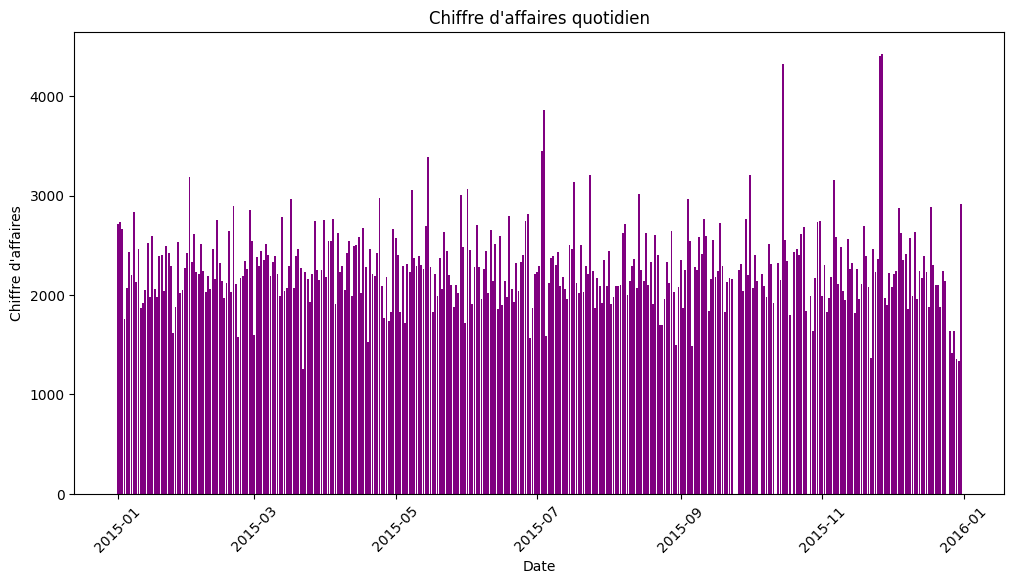

In [27]:
# 9. Analyse du chiffre d’affaires en fonction du temps :
# a. Quel est le chiffre d'affaires quotidien ?
daily_revenue_df = df.groupby('order_date').agg({'order_price': 'sum'}).reset_index()
print(daily_revenue_df.describe())
print()
plt.figure(figsize=(12, 6))
plt.bar(daily_revenue_df['order_date'], daily_revenue_df['order_price'], color='purple')
plt.title("Chiffre d'affaires quotidien")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()
print()

## Une corrélation entre l'heure de la journée et le total de la commande :

La première vue sur le scatter plot suggère que davantage de pizzas sont vendues pendant l'heure du déjeuner. Cependant, le coefficient de Spearman ainsi que la médiane des boîtes (box plot) indiquent que __l'heure de la journée n'a pas d'impact significatif sur les ventes__. Il est possible que le regroupement des heures en catégories (matin, déjeuner, après-midi, dîner, soirée) puisse modifier la situation.

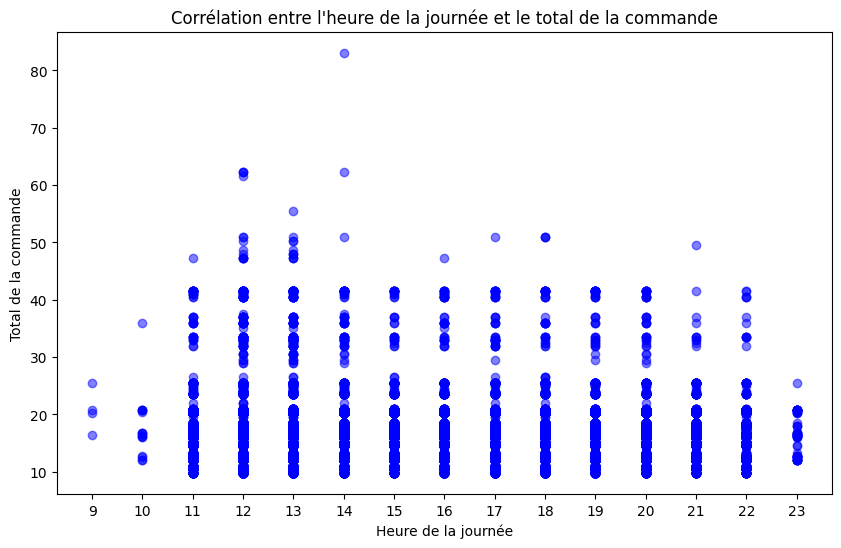

Spearman coefficient:
-0.013721090969017337



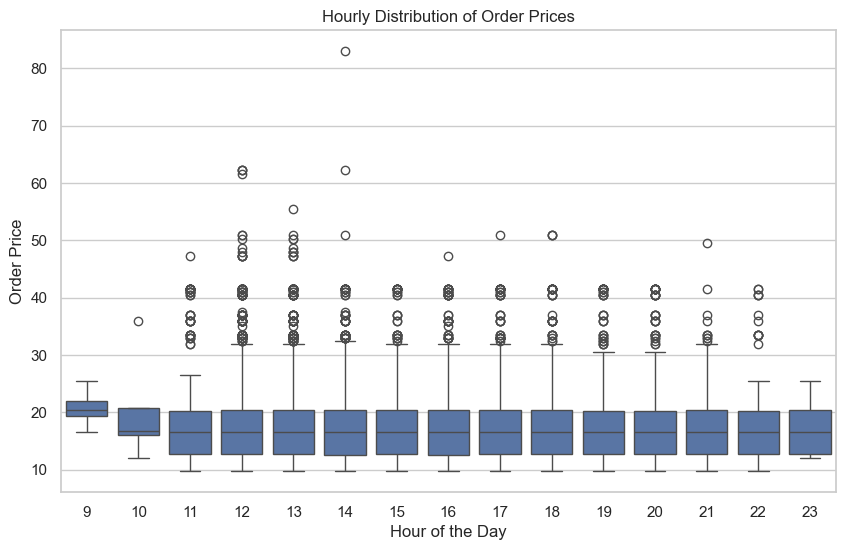

In [28]:
# 9. Analyse du chiffre d’affaires en fonction du temps :
# b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?
hourly_revenue_df = df[['order_time', 'order_price']].copy()
hourly_revenue_df['order_time'] = pd.to_datetime(hourly_revenue_df['order_time'], format='%H:%M:%S').dt.time
hourly_revenue_df['order_hour'] = hourly_revenue_df['order_time'].apply(lambda x: x.hour)
filtered_hourly_revenue_df = hourly_revenue_df[(hourly_revenue_df['order_hour'] >= 9) & (hourly_revenue_df['order_hour'] <= 23)]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_hourly_revenue_df['order_hour'], filtered_hourly_revenue_df['order_price'], alpha=0.5, color='blue')
plt.title("Corrélation entre l'heure de la journée et le total de la commande")
plt.xlabel("Heure de la journée")
plt.ylabel("Total de la commande")
plt.xticks(range(9, 24))  # Adjust x-axis ticks for hours from 9 to 23
plt.show()

print('Spearman coefficient:')
spearman_coefficient = hourly_revenue_df['order_hour'].corr(hourly_revenue_df['order_price'], method='spearman')
print(spearman_coefficient)
print()

# Set seaborn style
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_hour', y='order_price', data=filtered_hourly_revenue_df)

# Set plot labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Order Price')
plt.title('Hourly Distribution of Order Prices')

# Show the plot
plt.show()

## Les 5 pizzas les plus commandées en quantité  :

Les 5 pizzas les plus commandées en quantité :


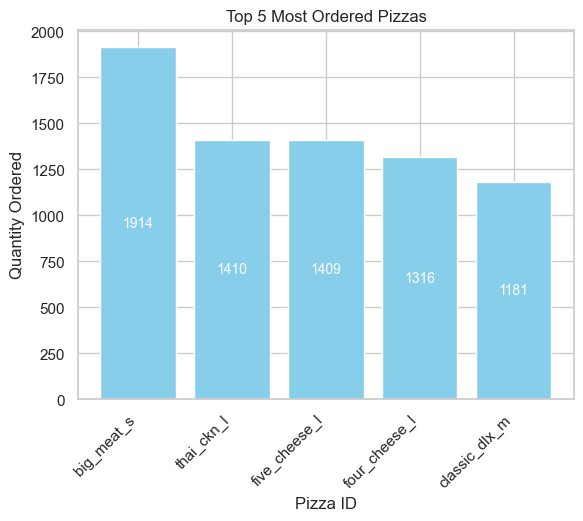

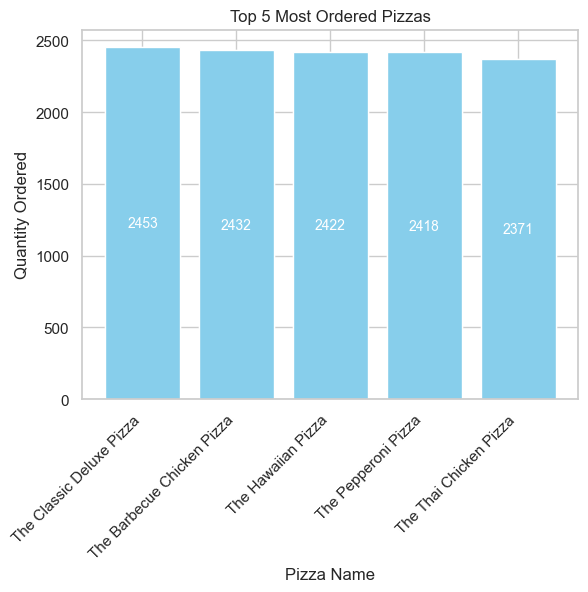

In [29]:
# 10.Pizzas populaires :
# a. Quelles sont les 5 pizzas les plus commandées en quantité ?
# By pizza ID
print('Les 5 pizzas les plus commandées en quantité :')
pizzas_quantity_df = df.groupby('pizza_id').agg({'quantity': 'sum'})
pizzas_quantity_df = pizzas_quantity_df.sort_values(by='quantity', ascending=False).reset_index()
pizza_id_name_mapping = dict(df[['pizza_id', 'pizza_name']].drop_duplicates().values)
pizzas_quantity_df['pizza_name'] = pizzas_quantity_df['pizza_id'].map(pizza_id_name_mapping)
#print(pizzas_quantity_df.head())
#print()

fig, ax = plt.subplots()
top5_pizzas = pizzas_quantity_df.head(5)
bars = ax.bar(top5_pizzas['pizza_id'], top5_pizzas['quantity'], color='skyblue')

# Add labels for quantity on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center', color='white', fontsize=10)

ax.bar(top5_pizzas['pizza_id'], top5_pizzas['quantity'], color='skyblue')
ax.set_xlabel('Pizza ID')
ax.set_ylabel('Quantity Ordered')
ax.set_title('Top 5 Most Ordered Pizzas')
plt.xticks(rotation=45, ha='right')
plt.show()
print()

# By pizza name
pizzas_quantity_df = df.groupby('pizza_name').agg({'quantity': 'sum'})
pizzas_quantity_df = pizzas_quantity_df.sort_values(by='quantity', ascending=False).reset_index()
#print(pizzas_quantity_df.head())
#print()

fig, ax = plt.subplots()
top5_pizzas = pizzas_quantity_df.head(5)
bars = ax.bar(top5_pizzas['pizza_name'], top5_pizzas['quantity'], color='skyblue')

# Add labels for quantity on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center', color='white', fontsize=10)

ax.bar(top5_pizzas['pizza_name'], top5_pizzas['quantity'], color='skyblue')
ax.set_xlabel('Pizza Name')
ax.set_ylabel('Quantity Ordered')
ax.set_title('Top 5 Most Ordered Pizzas')
plt.xticks(rotation=45, ha='right')
plt.show()


## Les 5 pizzas les plus commandées en termes de chiffre d'affaires  :

Les 5 pizzas les plus commandées en termes de chiffre daffaires :


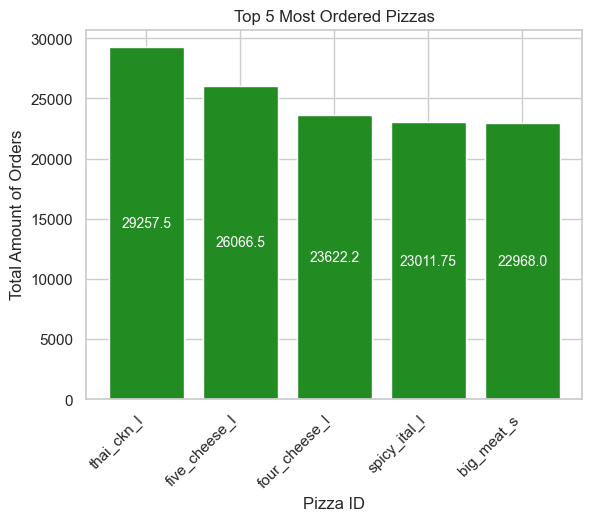

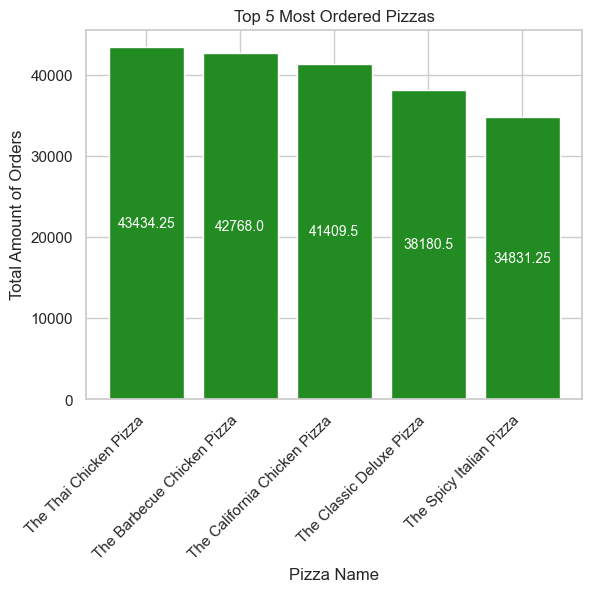

In [30]:
# 10.Pizzas populaires :
# b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?
print('Les 5 pizzas les plus commandées en termes de chiffre d''affaires :')
pizzas_quantity_df = df.groupby('pizza_id').agg({'order_price': 'sum'})
pizzas_quantity_df = pizzas_quantity_df.sort_values(by='order_price', ascending=False).reset_index()

fig, ax = plt.subplots()
top5_pizzas = pizzas_quantity_df.head(5)
bars = ax.bar(top5_pizzas['pizza_id'], top5_pizzas['order_price'], color='lightgreen')

# Add labels for quantity on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center', color='white', fontsize=10)

ax.bar(top5_pizzas['pizza_id'], top5_pizzas['order_price'], color='forestgreen')
ax.set_xlabel('Pizza ID')
ax.set_ylabel('Total Amount of Orders')
ax.set_title('Top 5 Most Ordered Pizzas')
plt.xticks(rotation=45, ha='right')
plt.show()
print()

pizzas_quantity_df = df.groupby('pizza_name').agg({'order_price': 'sum'})
pizzas_quantity_df = pizzas_quantity_df.sort_values(by='order_price', ascending=False).reset_index()

fig, ax = plt.subplots()
top5_pizzas = pizzas_quantity_df.head(5)
bars = ax.bar(top5_pizzas['pizza_name'], top5_pizzas['order_price'], color='lightgreen')

# Add labels for quantity on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center', color='white', fontsize=10)

ax.bar(top5_pizzas['pizza_name'], top5_pizzas['order_price'], color='forestgreen')
ax.set_xlabel('Pizza Name')
ax.set_ylabel('Total Amount of Orders')
ax.set_title('Top 5 Most Ordered Pizzas')
plt.xticks(rotation=45, ha='right')
plt.show()

## La répartition du chiffre d'affaires pour chaque taille de pizza :

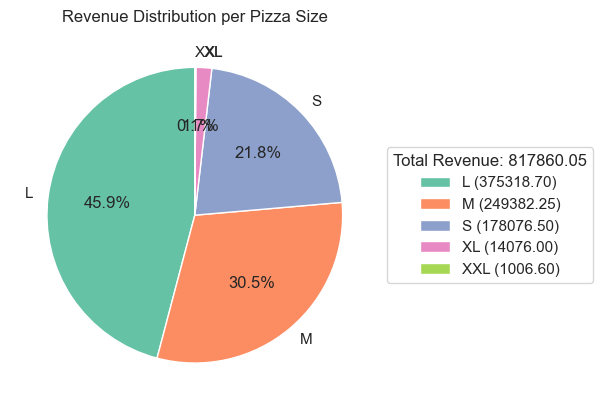

In [31]:
# 11.Chiffre d'affaires par taille et catégorie :
# a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?
pizzas_ca_per_size_df = df.groupby('pizza_size').agg({'order_price': 'sum'})
pizzas_ca_per_size_df = pizzas_ca_per_size_df.sort_values(by='order_price', ascending=False).reset_index()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pizzas_ca_per_size_df['order_price'],
                                  labels=pizzas_ca_per_size_df['pizza_size'],
                                  autopct='%1.1f%%', startangle=90,
                                  colors=plt.cm.Set2.colors)

# Add total revenue for each category in the legend
total_revenues = pizzas_ca_per_size_df['order_price'].sum()
legend_labels = [f"{label} ({revenue:.2f})" for label, revenue in zip(pizzas_ca_per_size_df['pizza_size'], pizzas_ca_per_size_df['order_price'])]
ax.legend(wedges, legend_labels, title=f'Total Revenue: {total_revenues:.2f}', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Revenue Distribution per Pizza Size')
plt.show()

## La répartition du chiffre d'affaires pour chaque catégorie de pizza :

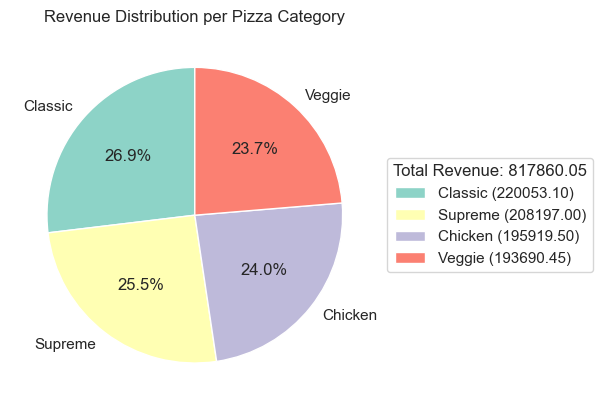

In [32]:
# 11.Chiffre d'affaires par taille et catégorie :
# b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?
pizzas_ca_per_category_df = df.groupby('pizza_category').agg({'order_price': 'sum'})
pizzas_ca_per_category_df = pizzas_ca_per_category_df.sort_values(by='order_price', ascending=False).reset_index()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pizzas_ca_per_category_df['order_price'],
                                  labels=pizzas_ca_per_category_df['pizza_category'],
                                  autopct='%1.1f%%', startangle=90,
                                  colors=plt.cm.Set3.colors)

# Add total revenue for each category in the legend
total_revenues = pizzas_ca_per_category_df['order_price'].sum()
legend_labels = [f"{label} ({revenue:.2f})" for label, revenue in zip(pizzas_ca_per_category_df['pizza_category'], pizzas_ca_per_category_df['order_price'])]
ax.legend(wedges, legend_labels, title=f'Total Revenue: {total_revenues:.2f}', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Revenue Distribution per Pizza Category')
plt.show()

## Une corrélation entre le prix unitaire et la quantité commandée :
Le coefficient de corrélation de Spearman est d'environ -0,163. Cela indique une corrélation monotonique négative faible entre les variables analysées. __Lorsque le prix augmente, la quantité tend à diminuer légèrement__ de manière monotonique. __Cependant, la corrélation n'est pas très forte__, comme le suggère la magnitude du coefficient.

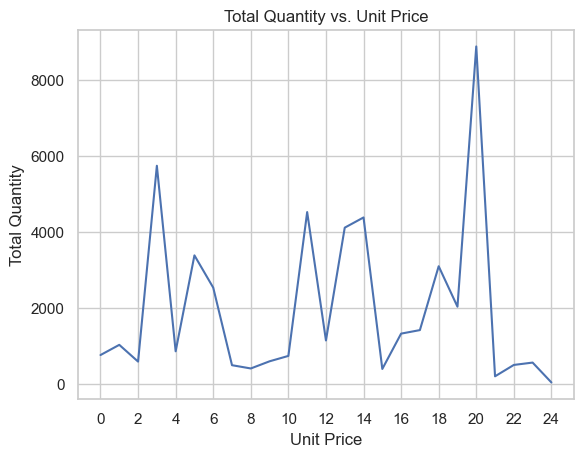

Spearman coefficient:
-0.16307692307692304



In [33]:
# 12.Corrélation entre prix et quantité :
# a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?
unit_price_order_qt_df = df.groupby('unit_price').agg({'quantity': 'sum'}).reset_index()
plt.plot(unit_price_order_qt_df.index, unit_price_order_qt_df['quantity'])
plt.xlabel('Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity vs. Unit Price')
plt.locator_params(axis='x', nbins=20)  # Adjust nbins as needed
plt.show()

print('Spearman coefficient:')
spearman_coefficient = unit_price_order_qt_df['unit_price'].corr(unit_price_order_qt_df['quantity'], method='spearman')
print(spearman_coefficient)
print()

## Le prix unitaire moyen pour différentes tailles de pizza :

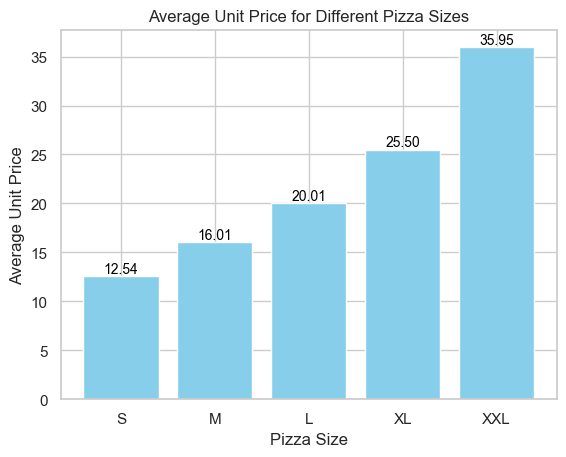

In [50]:
# 12.Corrélation entre prix et quantité :
# b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?
pizza_info_df = df[['pizza_id', 'pizza_size', 'unit_price']].drop_duplicates()
average_unit_price_by_size = pizza_info_df.groupby('pizza_size')['unit_price'].mean().reset_index()
average_unit_price_by_size['unit_price'] = average_unit_price_by_size['unit_price'].round(2)
average_unit_price_by_size = average_unit_price_by_size.sort_values(by='unit_price')
average_unit_price_by_size = average_unit_price_by_size.rename(columns={'unit_price': 'Average unit price'})

fig, ax = plt.subplots()
bars = ax.bar(average_unit_price_by_size['pizza_size'], average_unit_price_by_size['Average unit price'], color='skyblue')
ax.set_xlabel('Pizza Size')
ax.set_ylabel('Average Unit Price')
ax.set_title('Average Unit Price for Different Pizza Sizes')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=10)
plt.show()

## Les tendances saisonnières dans les commandes de pizza :

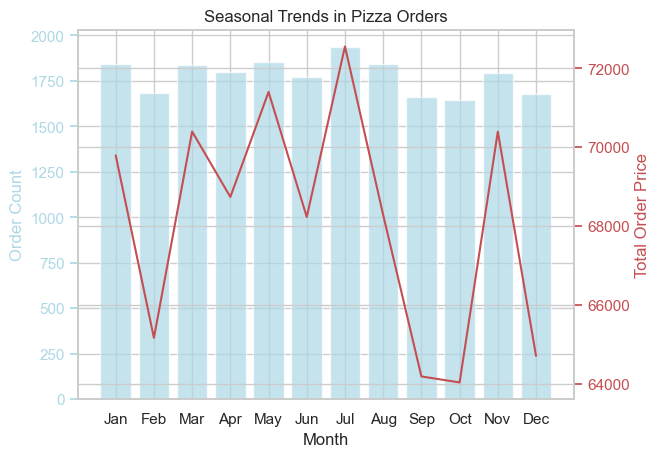

Total Order Price: 817860.05
Total Order Count: 21350


In [49]:
# 13.Tendances saisonnières :
# a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?
order_info_df = df[['order_id', 'order_date', 'order_price']].copy()
order_info_df = order_info_df.groupby('order_id').agg({'order_date': 'first', 'order_price': 'sum'}).reset_index()
# Extract month and year from the order_date
order_info_df['order_month'] = order_info_df['order_date'].dt.month
order_info_df['order_year'] = order_info_df['order_date'].dt.year
# Group by month and calculate the count of unique order IDs and the sum of their prices
monthly_orders = order_info_df.groupby(['order_year', 'order_month']).agg({'order_id': 'count', 'order_price': 'sum'}).reset_index()

fig, ax1 = plt.subplots()

# Plot order count on the left y-axis
ax1.bar(monthly_orders.index, monthly_orders['order_id'], color='lightblue', alpha=0.7, label='Order Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Order Count', color='lightblue')
ax1.tick_params('y', colors='lightblue')

# Create a secondary y-axis for order price
ax2 = ax1.twinx()
ax2.plot(monthly_orders.index, monthly_orders['order_price'], color='r', label='Total Order Price')
ax2.set_ylabel('Total Order Price', color='r')
ax2.tick_params('y', colors='r')

# Display x-axis labels as months (1-12)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_orders.index, month_labels)

plt.title('Seasonal Trends in Pizza Orders')
plt.show()

total_order_price = df['total_price'].sum()
print(f'Total Order Price: {total_order_price}')
unique_order_count = df['order_id'].nunique()
print(f'Total Order Count: {unique_order_count}')

## Une corrélation entre le jour de la semaine et la quantité de commandes :

Le test de Kruskal-Wallis est un test non paramétrique utilisé pour déterminer s'il existe des différences statistiquement significatives entre les médianes de trois groupes indépendants ou plus. Dans notre cas, les groupes correspondent aux différents jours de la semaine, et la variable d'intérêt est la quantité de commandes.  

Dans le résultat, la valeur de p est de 0,423. Cette valeur de p est plus élevée que le niveau de signification typique de 0,05. En statistique, une valeur de p supérieure au niveau de signification suggère que nous ne pouvons pas rejeter l'hypothèse nulle, indiquant l'absence de différence significative dans la médiane de la quantité de commandes entre les différents jours de la semae. 
n__Statistiquement, la distribution des quantités de commandes est similaire tous les jours de la semaine__k.__

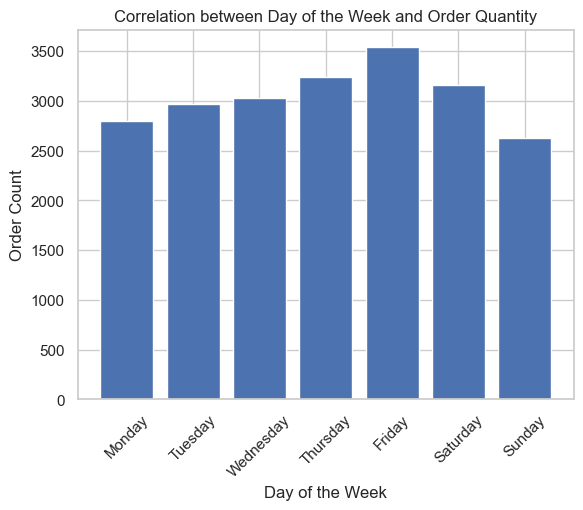

Kruskal-Wallis statistic: 6.0, p-value: 0.42319008112684364


In [36]:
# 13.Tendances saisonnières :
# b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?
unique_orders_df = df[['order_id', 'order_date']].drop_duplicates()

# Extract the day of the week from the order_date
unique_orders_df['order_day_of_week'] = unique_orders_df['order_date'].dt.day_name()

# Count unique orders by day of the week
orders_by_day = unique_orders_df['order_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.bar(orders_by_day.index, orders_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.title('Correlation between Day of the Week and Order Quantity')
plt.xticks(rotation=45) 
plt.show()

kruskal_result = stats.kruskal(*[orders_by_day[day] for day in orders_by_day.index])

print(f"Kruskal-Wallis statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")